In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Input,BatchNormalization,Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'

In [2]:
training_data_path = "../data/Training/"
testing_data_path =  "../data/Validation/"

#### Total number of classes and their counts

In [3]:
class_names = sorted(os.listdir(training_data_path))

number_of_male_images = len(os.listdir(training_data_path+"male"))
number_of_female_images = len(os.listdir(training_data_path+"female"))

print("Total Number of Classes :",len(class_names))
print("Classes Names :",class_names)
print("Total Male images :",number_of_male_images)
print("Total Female images :",number_of_female_images)

Total Number of Classes : 2
Classes Names : ['female', 'male']
Total Male images : 23766
Total Female images : 23243


#### Visualizing Distribution of both genders.

<function matplotlib.pyplot.show(close=None, block=None)>

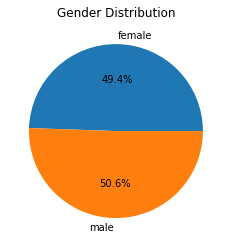

In [4]:
plt.pie(np.array([number_of_female_images,number_of_male_images]),labels=class_names,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show

Checking distribution of Test data also

<function matplotlib.pyplot.show(close=None, block=None)>

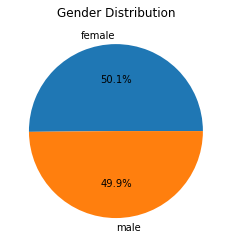

In [5]:
number_of_male_images_valid = len(os.listdir(testing_data_path+"male"))
number_of_female_images_valid = len(os.listdir(testing_data_path+"female"))
plt.pie(np.array([number_of_female_images_valid,number_of_male_images_valid]),labels=class_names,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show

#### Using ImageDataGenerator to preprocess and prepare Data for training

In [6]:
train_gen = ImageDataGenerator(rescale=1/255., rotation_range=10, horizontal_flip=True)

valid_gen = ImageDataGenerator(rescale=1/255)

# Load Data
train_ds = train_gen.flow_from_directory(training_data_path, class_mode='binary', 
                                         target_size=(50,50), shuffle=True, 
                                         batch_size=80) 

valid_ds = valid_gen.flow_from_directory(testing_data_path, class_mode='binary',
                                         target_size=(50,50),
                                         shuffle=True, batch_size=80) 

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


#### Building Model

In [11]:
inp = Input(shape = (50, 50, 3))
x = Conv2D(filters = 16 , kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(50, 50, 3))(inp)
x = Conv2D(16 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(16 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3,3), padding = "same", activation='relu')(x)
x = Dropout(rate=0.3)(x)


x = Conv2D(filters = 32 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(32 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(32 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization(momentum=0.5)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3,3), padding = "same", activation='relu')(x)
x = Dropout(rate=0.4)(x)

x = Conv2D(filters = 64 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(64 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(64 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3,3), padding = "same", activation='relu')(x)

x = Conv2D(filters = 128 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(128 , (3,3), padding = "same", activation='relu')(x)
x = Conv2D(128 , (3,3), padding = "same", activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3,3), padding = "same", activation='relu')(x)
x = Conv2D(filters = 128 , kernel_size=(3, 3), padding='SAME', activation='relu')(x)
x = Conv2D(128 , (3,3), padding = "same", activation='relu')(x)
x = Flatten()(x)

x = Dense(256 , activation = 'relu')(x) 
x = Dense(128 , activation = 'relu')(x) 
x = Dense(32 , activation = 'relu')(x) 
out = Dense(1 , activation = 'sigmoid')(x)
model = Model(inputs=inp, outputs=[out])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 16)        448       
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 batch_normalization_4 (Batc  (None, 50, 50, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                         

In [13]:
tf.test.gpu_device_name()

''

In [ ]:
cbs = [EarlyStopping(patience=3, restore_best_weights=True),
       ModelCheckpoint(filepath = "ModelCheckpoint.h5",
                       monitor= "val_loss",
                       save_best_only = True)]
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(train_ds, validation_data=valid_ds,
                    callbacks=cbs, epochs=15)

Epoch 1/15
588/588 [==============================] - 636s 1s/step - loss: 0.3274 - accuracy: 0.8525 - val_loss: 0.3245 - val_accuracy: 0.8758
Epoch 2/15
588/588 [==============================] - 428s 728ms/step - loss: 0.1823 - accuracy: 0.9329 - val_loss: 0.1345 - val_accuracy: 0.9522
Epoch 3/15
588/588 [==============================] - 779s 1s/step - loss: 0.1625 - accuracy: 0.9411 - val_loss: 0.1688 - val_accuracy: 0.9343
Epoch 4/15
588/588 [==============================] - ETA: 0s - loss: 0.1481 - accuracy: 0.9472

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc,  label='Training acc')
plt.plot(val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(loss,  label='Training loss')
plt.plot( val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [ ]:
model.save('../models/model.h5')

: 

In [ ]:
from tensorflow import keras
model = keras.models.load_model('path/to/location')